In [66]:
import os
import rasterio as rio
import seaborn as sns
import geopandas as gpd
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
pac_dir = 'X:/data/pacific'
out_dir = os.path.join(pac_dir, 'temp')

In [7]:
pac_path = r'C:\Users\wb514197\WBG\EEAPV Pacific Observatory Files - Geospatial and Big Data\Data\Admin Boundaries'
pac_adm0 = gpd.read_file(os.path.join(pac_path, "Adm0_Pacific.shp"))

In [10]:
sel = [
    'Federated States of Micronesia', 
    'Fiji',
    'Kiribati',
    'Marshall Islands',
    'Nauru',
    'Palau',
    'Papua New Guinea',
    'Samoa',
    'Solomon Islands',
    'Tonga',
    'Tuvalu',
    'Vanuatu'
]

In [11]:
pac = pac_adm0.loc[pac_adm0.WB_ADM0_NA.isin(sel)].copy()

In [12]:
for idx, row in pac.iterrows():
    print(idx)

3
10
11
12
14
19
21
23
24
26
27
28


In [17]:
files = glob(out_dir+f"/{row.ISO3}*.tif")

In [18]:
files

['X:/data/pacific\\temp\\VUT_2021.tif']

In [40]:
data_rio = rio.open(files[0])
data = data_rio.read(1)

In [41]:
data[data==-1] = np.nan

In [42]:
data = data.flatten()

In [58]:
data = data[~np.isnan(data)]

(array([0.00000000e+00, 2.76796000e+00, 7.05217824e+00, 8.46947324e-02,
        2.94533459e-02, 1.34830872e-02, 1.15195308e-02, 7.59241805e-03,
        5.36705414e-03, 4.84343910e-03, 3.79620903e-03, 2.87988271e-03,
        2.09446015e-03, 1.83265263e-03, 2.61807519e-03, 5.23615038e-04,
        1.04723008e-03, 7.85422557e-04, 9.16326317e-04, 7.85422557e-04,
        6.54518798e-04, 1.17813384e-03, 1.30903760e-04, 6.54518798e-04,
        6.54518798e-04, 1.30903760e-03, 1.30903760e-04, 3.92711279e-04,
        5.23615038e-04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9]),
 <a list of 29 Patch objects>)

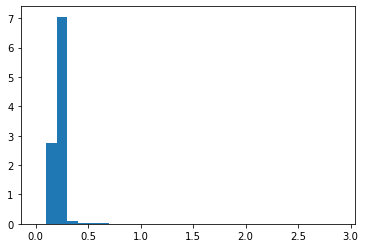

In [75]:
plt.hist(data, bins=np.arange(0, 3, 0.1), density=True)

In [70]:
df = pd.DataFrame(data, columns=['rad'])

In [72]:
sns.displot(data, x="rad", stat="density", common_norm=False)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sns.displot(data, x="rad", hue='pop_density_cut', stat="density", common_norm=False)